In [1]:
from src.dataloader import LabelAttribution
from src.dataloader import CustomImageDataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torchvision.transforms import ToTensor


# Import des données

Terminologie:
* 1 epoch = un forward et un backward pass sur les individus tirés
* batch size = nombre d'individus de l'échantillon d'apprentissage dans un forward/backward pass. Plus le batck size est élevé, plus il faut de mémoire
* number of iterations = nombre de passes, chaque pass utilisant [batch size] number of examples. 
  1 pass = 1 forward pass + 1 backward pass (we do not count the forward pass and backward pass as two different passes).

Exemple: si j'ai 1000 individus dans l'échantillon d'apprentissage, et que batch_size=500.
* 1st pass: 500 individus tirés pour le forward
* 2nd pass: 500 individus tirés pour le backward

Donc, il faut 2 itérations pour réaliser un epoch.

In [2]:
label_attribution=LabelAttribution(path_image_google="C:/Users/yanis/OneDrive/Documents/Projet Stat/Données/bdappv/google/img/", 
                                   path_mask_google='C:/Users/yanis/OneDrive/Documents/Projet Stat/Données/bdappv/google/mask/',
                                   path_metadata='C:/Users/yanis/OneDrive/Documents/Projet Stat/Données/bdappv/metadata.csv',
                                   colonne_identifiant='identifiant',
                                   path_export_train_test="C:/Users/yanis/OneDrive/Documents/Projet Stat/statapps",
                                   path_image_ign='C:/Users/yanis/OneDrive/Documents/Projet Stat/Données/bdappv/ign/img',
                                   path_mask_ign='C:/Users/yanis/OneDrive/Documents/Projet Stat/Données/bdappv/ign/mask/',
                                   use_img_google=True,
                                   use_img_ign=False
                                    )

In [3]:
label_attribution.run()

c:\Users\yanis\OneDrive\Documents\Projet Stat\statapps\src\dataloader.py:63: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  im['Label'] = im[self.colonne_identifiant].isin(im_mask_ign[self.colonne_identifiant].append(im_mask_google[self.colonne_identifiant])).astype(int)


In [4]:
training_data="C:/Users/yanis/OneDrive/Documents/Projet Stat/statapps/train_data.csv"
test_data="C:/Users/yanis/OneDrive/Documents/Projet Stat/statapps/test_data.csv"

In [5]:
training_data = CustomImageDataset(training_data,"C:/Users/yanis/OneDrive/Documents/Projet Stat/Données/bdappv/google/img/" , transform=ToTensor())
test_data = CustomImageDataset(test_data,"C:/Users/yanis/OneDrive/Documents/Projet Stat/Données/bdappv/google/img/", transform=ToTensor())



In [34]:
print("Nombre d'images dans le train: {}".format(training_data.__len__()))
print("Nombre d'images dans le test: {}".format(test_data.__len__()))

Nombre d'images dans le train: 23045
Nombre d'images dans le test: 5762


In [39]:
print(training_data.__getitem__(0)[0].size())
print(test_data.__getitem__(0)[0].size())

torch.Size([3, 400, 400])
torch.Size([3, 400, 400])


Les images sont bien au format RGB et de dimension 400*400.

In [33]:
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 3, 400, 400])


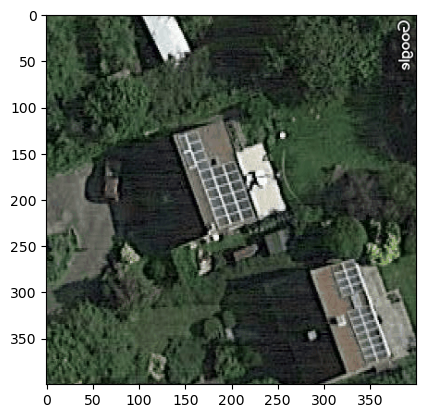

Label: 1


In [20]:
# Display image and label.

train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
#print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img.T)
plt.show()
print(f"Label: {label}")